# Regressão Linear Múltipla OLS

Este [dataset](https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo) é um conjunto de dados fornecidos no [Kaggle](https://www.kaggle.com/), uma plataforma voltada a competição de programação e acesso à conjunto de dados de todo o mundo. É totalmente gratuito e apresenta uma forte comunidade de Cientistas de Dados e Machine Learning.

Sobre os dados, eles foram criados coletando dados sobre o consumo de cerveja na cidade de São Paulo na uma área universitária, cujos frequentadores eram, em sua média, estudantes entre 18 e 28 anos.

Esse dataset, apresenta as categorias como:

| Descrição
| ---
| Dia que o dado foi anotado
| Temperatura média do dia em ºC
| Temperatura mínima do dia em ºC
| Temperatura máxima do dia em ºC
| Quantos mm chuva caiu naquele dia
| Verificar se for Sábado ou Domingo
| Consumo de cerveja em litros

Neste exercício iremos:
- Importar os dados e criar o Dataframe
- Realizar a limpeza e manipulação dos dados
- Realizar uma análise exploratória de dados (EDA)
- Encontrar a correlação do consumo com a temperatura máxima
- Treinar o modelo de Regressão Linear **Ordinary Least Squares** utilizando a **temp_max**.
- Treinar um modelo de regressão múltipla
- Tratar e transformar o dados
- Otimizar o modelo


###  Importar Bibliotecas e CSV

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LinearRegression
from statsmodels.regression.linear_model import OLS

###  Criar o dataframe

Renomerar as colunas para facilitar o coding

In [2]:
df = pd.read_csv('Consumo_cerveja.csv')
display(df)

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
...,...,...,...,...,...,...,...
936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns = ['data', 'temp_med',
              'temp_min','temp_max', 'precipitacao', 'fimsemana', 'consumo']
display(df)

,data,temp_med,temp_min,temp_max,precipitacao,fimsemana,consumo
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
...,...,...,...,...,...,...,...
936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Análise Inicial

#### Informações gerais
- Número de dados
- Número de atributos
- Valores ausentes por coluna

In [7]:
print('Informações sobre o dataset: \n')
print(f'Número de dados: \t {df.shape[0]}\n')
print(f'Número de colunas: \t {df.shape[1]}')
print(f'Valores ausentes por coluna: \n {df.isnull().sum()}')
df.info()

Informações sobre o dataset: 

Número de dados: 	 941

Número de colunas: 	 7
Valores ausentes por coluna: 
 data            576
temp_med        576
temp_min        576
temp_max        576
precipitacao    576
fimsemana       576
consumo         576
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   data          365 non-null    object 
 1   temp_med      365 non-null    object 
 2   temp_min      365 non-null    object 
 3   temp_max      365 non-null    object 
 4   precipitacao  365 non-null    object 
 5   fimsemana     365 non-null    float64
 6   consumo       365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 51.6+ KB


### Data Cleaning

#### Valores Ausentes

In [8]:
df = df.dropna()
display(df)

,data,temp_med,temp_min,temp_max,precipitacao,fimsemana,consumo
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
...,...,...,...,...,...,...,...
360,2015-12-27,24,"21,1","28,2","13,6",1.0,32.307
361,2015-12-28,"22,64","21,1","26,7",0,0.0,26.095
362,2015-12-29,"21,68","20,3","24,1","10,3",0.0,22.309
363,2015-12-30,"21,38","19,3","22,4","6,3",0.0,20.467


#### Converter dados corretamente

In [9]:
#Transformação da coluna data para tipo datetime
df['data'] = pd.to_datetime(df['data'], format='%Y-%m-%d')

#Transformação do resto das colunas de objeto para float
df['temp_med'] = df['temp_med'].str.replace(',','.').astype(float)
df['temp_min'] = df['temp_min'].str.replace(',','.').astype(float)
df['temp_max'] = df['temp_max'].str.replace(',','.').astype(float)
df['precipitacao'] = df['precipitacao'].str.replace(',','.').astype(float)

df['fimsemana'] = df['fimsemana'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   data          365 non-null    datetime64[ns]
 1   temp_med      365 non-null    float64       
 2   temp_min      365 non-null    float64       
 3   temp_max      365 non-null    float64       
 4   precipitacao  365 non-null    float64       
 5   fimsemana     365 non-null    int32         
 6   consumo       365 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int32(1)
memory usage: 21.4 KB


<ipython-input-9-1c5346918b2a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['data'] = pd.to_datetime(df['data'], format='%Y-%m-%d')
<ipython-input-9-1c5346918b2a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['temp_med'] = df['temp_med'].str.replace(',','.').astype(float)
<ipython-input-9-1c5346918b2a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

### EDA

#### Describe

In [10]:
display(df.describe(include='all'))

<ipython-input-10-c5ad0206ba20>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  display(df.describe(include='all'))


,data,temp_med,temp_min,temp_max,precipitacao,fimsemana,consumo
count,365,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
unique,365,NaN,NaN,NaN,NaN,NaN,NaN
top,2015-06-18 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
first,2015-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,2015-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,21.226356,17.461370,26.611507,5.196712,0.284932,25.401367
std,NaN,3.180108,2.826185,4.317366,12.417844,0.452001,4.399143
min,NaN,12.900000,10.600000,14.500000,0.000000,0.000000,14.343000
25%,NaN,19.020000,15.300000,23.800000,0.000000,0.000000,22.008000


#### Gráfico de consumo x tempo

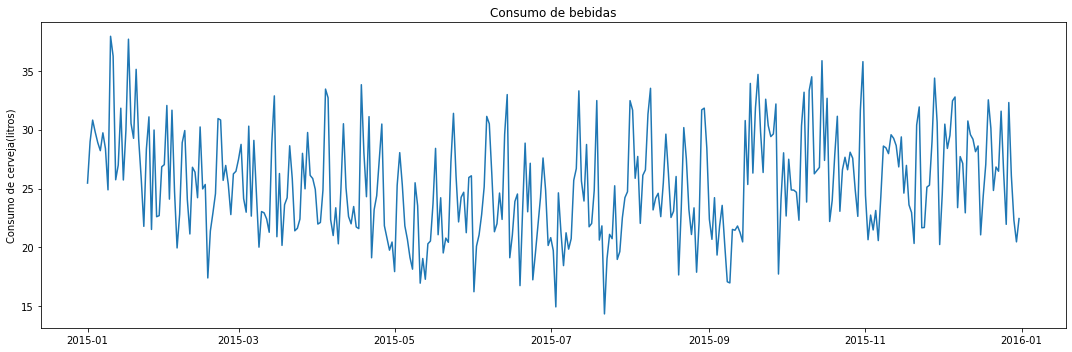

In [13]:
plt.figure(figsize=(15,5))

plt.plot_date(x='data', y='consumo', data=df, fmt='-')
plt.title('Consumo de bebidas')
plt.ylabel('Consumo de cerveja(litros)')

plt.tight_layout()
plt.show()

#### Gráfico mostrando as flutuações das variáveis ao longo do tempo

O ideal é conseguir visualizar estas 4:
- temp_max
- temp_med
- temp_min
- consumo

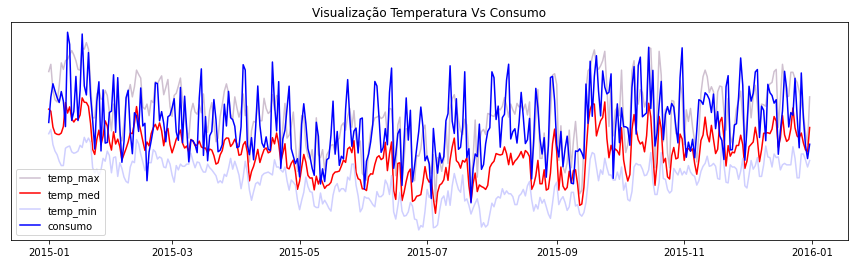

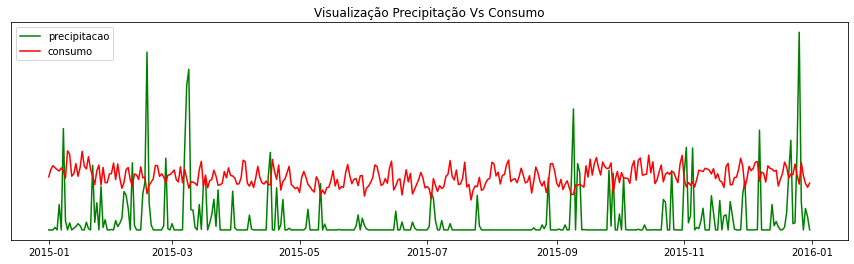

In [14]:
plt.figure(figsize=(15,4))
plt.gca().axes.get_yaxis().set_visible(False)
plt.plot_date(x='data',y='temp_max',data=df,fmt='-',c='#CFC0D0');
plt.plot_date(x='data',y='temp_med',data=df,fmt='-',c='r');
plt.plot_date(x='data',y='temp_min',data=df,fmt='-',c='#CFCFFF');
plt.plot_date(x='data',y='consumo',data=df,fmt='-',c='#0000FF');
plt.title("Visualização Temperatura Vs Consumo")
plt.legend()



plt.figure(figsize=(15,4))
plt.plot_date(x='data',y='precipitacao',data=df,fmt='-',c='g');
plt.plot_date(x='data',y='consumo',data=df,fmt='-',c='r');
plt.title("Visualização Precipitação Vs Consumo")
plt.gca().axes.get_yaxis().set_visible(False)
plt.legend()
plt.show()

#### Gráfico de correlação

consumo         1.000000
temp_max        0.642672
temp_med        0.574615
fimsemana       0.505981
temp_min        0.392509
precipitacao   -0.193784
Name: consumo, dtype: float64


<AxesSubplot:>

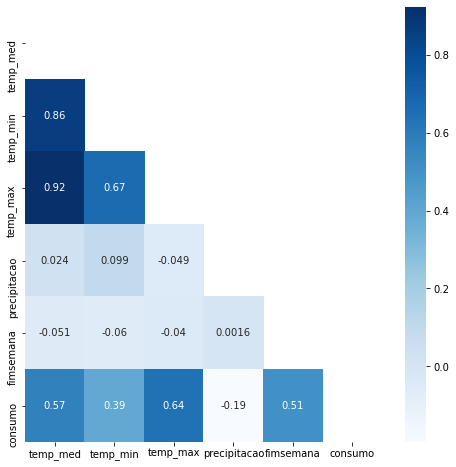

In [16]:
print(df.corr()['consumo'].sort_values(ascending = False) )

correlation = df.corr()

f, ax = plt.subplots(figsize=(8, 8))

# Cria uma máscara para camuflar a parte de cima do mapa
mask = np.triu(np.ones_like(correlation,dtype=bool))

# Plot do mapa de calor
sns.heatmap(correlation,cmap='Blues',mask=mask, square=False,annot=True)

###  Separar conjunto de Treino e Teste

In [ ]:
X = df['temp_max']
y = df['consumo']

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=75)

## Treinar o modelo OLS

In [26]:
reg1 = OLS(y_train, X_train)
reg1fit = reg1.fit() 

## Validar o modelo

In [27]:
print(reg1fit.summary())

                                 OLS Regression Results                                
Dep. Variable:                consumo   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                          1.507e+04
Date:                Mon, 07 Feb 2022   Prob (F-statistic):                   1.09e-252
Time:                        23:27:29   Log-Likelihood:                         -786.21
No. Observations:                 292   AIC:                                      1574.
Df Residuals:                     291   BIC:                                      1578.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

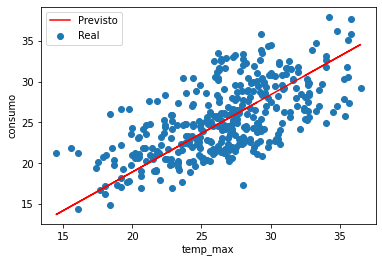

In [30]:
y_pred_1 = reg1fit.predict(X_test)

y_pred_total = reg1fit.predict(X)
plt.scatter(X,y,label='Real')
plt.plot(X,y_pred_total,label='Previsto',color='red')
plt.xlabel('temp_max')
plt.ylabel('consumo')
plt.legend()

plt.show()